# ***Vehicles Detection Using CNN with ResNet50 BaseLine Model***


# ***Importing modules and Loading datasets***

In [11]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras 
from glob import glob
from keras.models import Sequential
from keras.layers import BatchNormalization,MaxPool2D,Dense,Conv2D,Flatten
from keras.callbacks import EarlyStopping,LearningRateScheduler
import warnings
from tqdm import tqdm
from PIL import Image
warnings.filterwarnings('ignore')

# **Download from Google Drive**

In [12]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Vehicles_Detection_dataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Vehicles_Detection_dataset.zip')
!unzip Vehicles_Detection_dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: data/train/vehicles/389.png  
 extracting: data/train/vehicles/3890.png  
 extracting: data/train/vehicles/3891.png  
 extracting: data/train/vehicles/3892.png  
 extracting: data/train/vehicles/3893.png  
 extracting: data/train/vehicles/3894.png  
 extracting: data/train/vehicles/3895.png  
  inflating: data/train/vehicles/3896.png  
 extracting: data/train/vehicles/3897.png  
 extracting: data/train/vehicles/3898.png  
 extracting: data/train/vehicles/3899.png  
 extracting: data/train/vehicles/39.png  
 extracting: data/train/vehicles/390.png  
 extracting: data/train/vehicles/3900.png  
  inflating: data/train/vehicles/3901.png  
 extracting: data/train/vehicles/3902.png  
 extracting: data/train/vehicles/3903.png  
 extracting: data/train/vehicles/3904.png  
 extracting: data/train/vehicles/3905.png  
 extracting: data/train/vehicles/3906.png  
  inflating: data/train/vehicles/3907.png  
 extracting: data/train/vehic

In [13]:
# Define constants
BATCH_SIZE = 32
IMG_SIZE = (64, 64)
NO_CLASSES = 2

# **Data Augmentation**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define image data generator with augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.2,1.0],
    rescale = 1/255,
    fill_mode='nearest')

test_datagon = ImageDataGenerator(
    rescale = 1/255
)    

# generate batches of augmented data with labels
train_dataset = train_datagen.flow_from_directory(
    'data/train/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True
)
test_dataset = test_datagon.flow_from_directory(
    'data/test/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True
)
val_dataset = test_datagon.flow_from_directory(
    'data/validation/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True
)

Found 12971 images belonging to 2 classes.
Found 2764 images belonging to 2 classes.
Found 2025 images belonging to 2 classes.


In [15]:
class_names = train_dataset.class_indices.keys()
class_names

dict_keys(['non-vehicles', 'vehicles'])

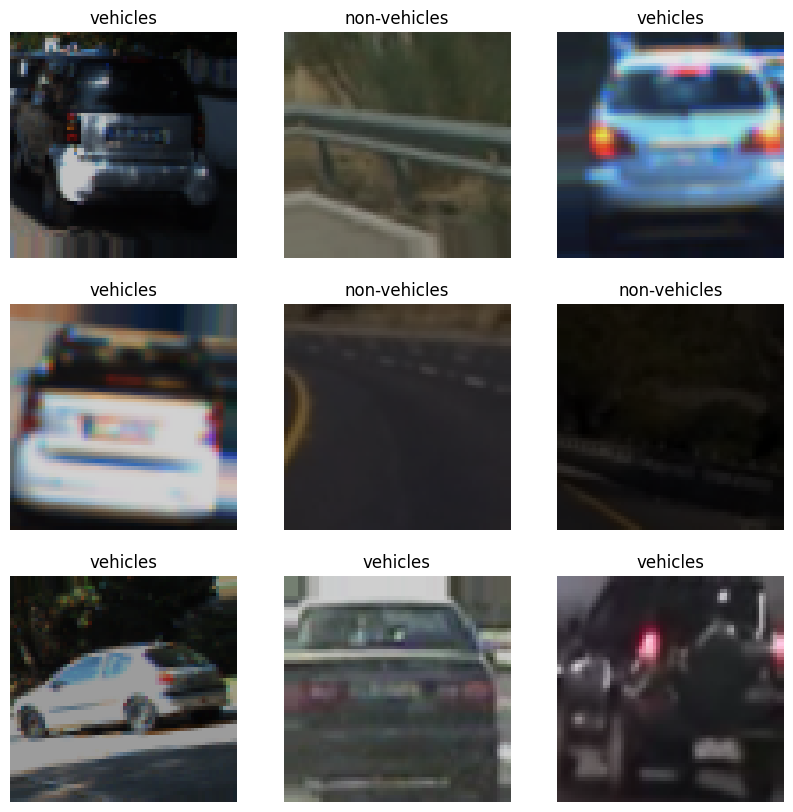

In [16]:

# Plot some images from the training dataset
import matplotlib.pyplot as plt

batch = next(train_dataset)
images = batch[0]
labels = batch[1]
class_names = list(train_dataset.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

plt.show()

# **CallBack Function**

In [17]:
early_stop=EarlyStopping(monitor='val_accuracy',patience=3)

# **ResNet50 Baseline CNN Model**

In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(include_top=False, 
                      weights=None, 
                      input_shape=(64, 64, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=val_dataset,
    batch_size=32,
    callbacks=[early_stop],
)

Epoch 1/25
406/406 [==============================] - 95s 113ms/step - loss: 0.3234 - accuracy: 0.8754 - val_loss: 1010.0211 - val_accuracy: 0.5220
Epoch 2/25
406/406 [==============================] - 44s 108ms/step - loss: 0.1732 - accuracy: 0.9350 - val_loss: 0.2246 - val_accuracy: 0.9106
Epoch 3/25
406/406 [==============================] - 42s 104ms/step - loss: 0.0912 - accuracy: 0.9671 - val_loss: 0.1882 - val_accuracy: 0.9259
Epoch 4/25
406/406 [==============================] - 42s 104ms/step - loss: 0.0682 - accuracy: 0.9772 - val_loss: 0.1418 - val_accuracy: 0.9521
Epoch 5/25
406/406 [==============================] - 43s 105ms/step - loss: 0.0572 - accuracy: 0.9802 - val_loss: 0.1311 - val_accuracy: 0.9565
Epoch 6/25
406/406 [==============================] - 46s 112ms/step - loss: 0.0552 - accuracy: 0.9820 - val_loss: 0.1381 - val_accuracy: 0.9541
Epoch 7/25
406/406 [==============================] - 42s 104ms/step - loss: 0.0534 - accuracy: 0.9824 - val_loss: 0.1447 - val

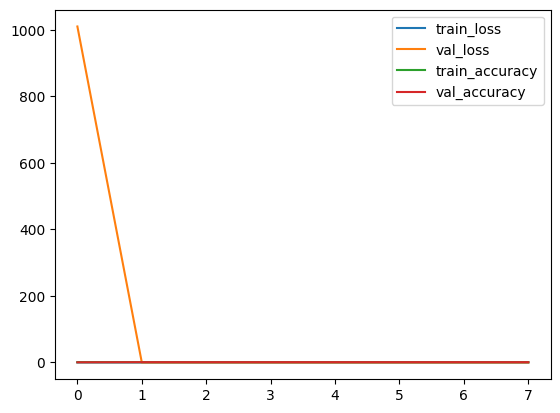

In [21]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# **Performance Test**

87/87 [==============================] - 6s 68ms/step - loss: 0.1496 - accuracy: 0.9472


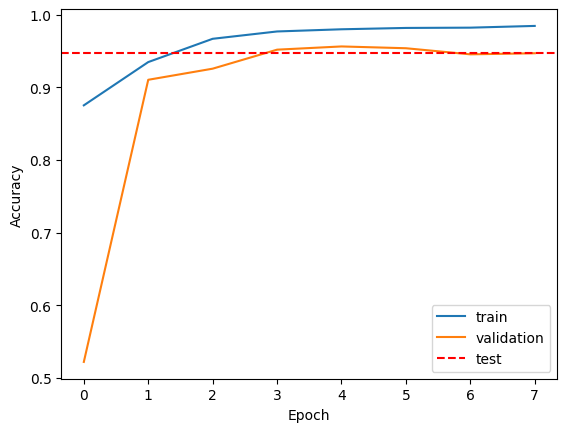

In [22]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)

# Plot the performance
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.axhline(y=test_acc, color='r', linestyle='--', label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Testing by UserInput Image**

Saving scorpio-classic-exterior-left-front-three-quarter.jpg to scorpio-classic-exterior-left-front-three-quarter.jpg


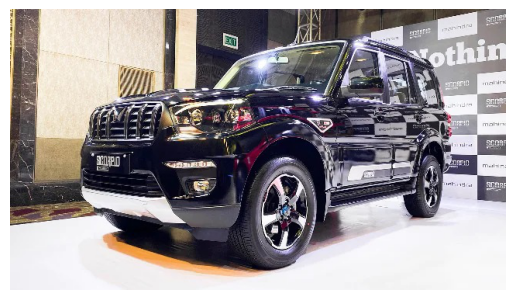

1/1 [==============================] - 0s 40ms/step
Vehicle detected in the image!


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Define a function to preprocess the image
def preprocess_image(img_path):
  img = image.load_img(img_path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x/255.
  return x

# Define a function to predict whether there's a vehicle in the image or not
def predict_vehicle(img_path):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  x = preprocess_image(img_path)
  prediction = model.predict(x)
  if prediction[0][0] != 1:
    print("Vehicle detected in the image!")
  else:
    print("No vehicle detected in the image.")

# Allow the user to upload an image
from google.colab import files
uploaded = files.upload()

# Call the predict_vehicle function for the uploaded image
for fn in uploaded.keys():
  path = fn
  predict_vehicle(path)
